### Przygotowanie do zajęć

1. W konsoli linuxowej:
 - pip install gensim
 - pip install nltk

2. w Jupyterze (pobieranie zasobów):
 - `import nltk`
 - `nltk.download("popular")`

3. w Jupyterze:
 - `from sklearn.datasets import fetch_20newsgroups`
 - `newsgroups_train = fetch_20newsgroups(subset='train')`


# Analiza danych tekstowych

### Co możemy chcieć robić z danymi tekstowymi

- klasyfikować - np. maile od klientów
- grupować tematycznie - np. po to, aby rekomendować teksty o podobnej tematyce
- analizować podobieństwo - np. aby wyszukać teksty na szukany temat
- tagować - przypisywac slowa kluczowe, aby opisać o czym jest
- wyciągać informacje - kwoty, daty, osoby, itd.

Praca z danymi tekstowymi = Przygotowanie + Reprezentacja + Algorytm

Dla "maszyny" tekst to ciąg nic nie znaczących znaków

<br>

<br>

<br>

<br>

## Obróbka tekstu

In [1]:
import nltk
from bs4 import BeautifulSoup
import numpy as np

wiki = "http://en.wikipedia.org/wiki/"
titles = ["Integral", "Riemann_integral", "Riemann-Stieltjes_integral", "Derivative",
    "Limit_of_a_sequence", "Edvard_Munch", "Vincent_van_Gogh", "Jan_Matejko",
    "Lev_Tolstoj", "Franz_Kafka", "J._R._R._Tolkien"]

from urllib.request import urlopen

def parse(url):        
    x = urlopen(url).read()
    x = BeautifulSoup(x).find("div",id="bodyContent").find_all("p")
    return(x)

articles = [parse(url) for url in [wiki+x for x in titles]]
articles = [" ".join([str(paragraph) for paragraph in article]) for article in articles]

articles[0][:200]

'<p>In <a href="/wiki/Mathematics" title="Mathematics">mathematics</a>, an <b>integral</b> assigns numbers to functions in a way that describes displacement, <a href="/wiki/Area" title="Area">area</a>,'

In [2]:
import re
articles = [re.sub("<.+?>"," ",a) for a in articles] # ew (str(a))
articles[0]

' In  mathematics , an  integral  assigns numbers to functions in a way that describes displacement,  area ,  volume , and other concepts that arise by combining  infinitesimal  data. The process of finding integrals is called  integration . Along with  differentiation , integration is a fundamental, essential operation of  calculus ,  [a]   and serves as a tool to solve problems in mathematics and  physics  involving the area of an arbitrary shape, the length of a curve, and the volume of a solid, among others.\n   The integrals enumerated here are those termed  definite integrals , which can be interpreted as the signed  area  of the region in the plane that is bounded by the  graph  of a given  function  between two points in the  real line . Conventionally, areas above the horizontal axis of the plane are positive while areas below are negative. Integrals also refer to the concept of an  antiderivative , a function whose derivative is the given function. In this case, they are call

In [3]:
articles = [a.lower() for a in articles]
articles[0]

' in  mathematics , an  integral  assigns numbers to functions in a way that describes displacement,  area ,  volume , and other concepts that arise by combining  infinitesimal  data. the process of finding integrals is called  integration . along with  differentiation , integration is a fundamental, essential operation of  calculus ,  [a]   and serves as a tool to solve problems in mathematics and  physics  involving the area of an arbitrary shape, the length of a curve, and the volume of a solid, among others.\n   the integrals enumerated here are those termed  definite integrals , which can be interpreted as the signed  area  of the region in the plane that is bounded by the  graph  of a given  function  between two points in the  real line . conventionally, areas above the horizontal axis of the plane are positive while areas below are negative. integrals also refer to the concept of an  antiderivative , a function whose derivative is the given function. in this case, they are call

In [4]:
articles = [nltk.word_tokenize(a) for a in articles]
articles[0]

['in',
 'mathematics',
 ',',
 'an',
 'integral',
 'assigns',
 'numbers',
 'to',
 'functions',
 'in',
 'a',
 'way',
 'that',
 'describes',
 'displacement',
 ',',
 'area',
 ',',
 'volume',
 ',',
 'and',
 'other',
 'concepts',
 'that',
 'arise',
 'by',
 'combining',
 'infinitesimal',
 'data',
 '.',
 'the',
 'process',
 'of',
 'finding',
 'integrals',
 'is',
 'called',
 'integration',
 '.',
 'along',
 'with',
 'differentiation',
 ',',
 'integration',
 'is',
 'a',
 'fundamental',
 ',',
 'essential',
 'operation',
 'of',
 'calculus',
 ',',
 '[',
 'a',
 ']',
 'and',
 'serves',
 'as',
 'a',
 'tool',
 'to',
 'solve',
 'problems',
 'in',
 'mathematics',
 'and',
 'physics',
 'involving',
 'the',
 'area',
 'of',
 'an',
 'arbitrary',
 'shape',
 ',',
 'the',
 'length',
 'of',
 'a',
 'curve',
 ',',
 'and',
 'the',
 'volume',
 'of',
 'a',
 'solid',
 ',',
 'among',
 'others',
 '.',
 'the',
 'integrals',
 'enumerated',
 'here',
 'are',
 'those',
 'termed',
 'definite',
 'integrals',
 ',',
 'which',
 'ca

In [5]:
?nltk.word_tokenize

In [6]:
?nltk.TreebankWordTokenizer

In [7]:
stopwords = nltk.corpus.stopwords.words("english")
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
articles = [[w for w in a if w not in stopwords] for a in articles]
articles[0]

['mathematics',
 ',',
 'integral',
 'assigns',
 'numbers',
 'functions',
 'way',
 'describes',
 'displacement',
 ',',
 'area',
 ',',
 'volume',
 ',',
 'concepts',
 'arise',
 'combining',
 'infinitesimal',
 'data',
 '.',
 'process',
 'finding',
 'integrals',
 'called',
 'integration',
 '.',
 'along',
 'differentiation',
 ',',
 'integration',
 'fundamental',
 ',',
 'essential',
 'operation',
 'calculus',
 ',',
 '[',
 ']',
 'serves',
 'tool',
 'solve',
 'problems',
 'mathematics',
 'physics',
 'involving',
 'area',
 'arbitrary',
 'shape',
 ',',
 'length',
 'curve',
 ',',
 'volume',
 'solid',
 ',',
 'among',
 'others',
 '.',
 'integrals',
 'enumerated',
 'termed',
 'definite',
 'integrals',
 ',',
 'interpreted',
 'signed',
 'area',
 'region',
 'plane',
 'bounded',
 'graph',
 'given',
 'function',
 'two',
 'points',
 'real',
 'line',
 '.',
 'conventionally',
 ',',
 'areas',
 'horizontal',
 'axis',
 'plane',
 'positive',
 'areas',
 'negative',
 '.',
 'integrals',
 'also',
 'refer',
 'concept

In [9]:
stemmer = nltk.PorterStemmer()
articles = [[stemmer.stem(w) for w in a] for a in articles]
articles[0]

['mathemat',
 ',',
 'integr',
 'assign',
 'number',
 'function',
 'way',
 'describ',
 'displac',
 ',',
 'area',
 ',',
 'volum',
 ',',
 'concept',
 'aris',
 'combin',
 'infinitesim',
 'data',
 '.',
 'process',
 'find',
 'integr',
 'call',
 'integr',
 '.',
 'along',
 'differenti',
 ',',
 'integr',
 'fundament',
 ',',
 'essenti',
 'oper',
 'calculu',
 ',',
 '[',
 ']',
 'serv',
 'tool',
 'solv',
 'problem',
 'mathemat',
 'physic',
 'involv',
 'area',
 'arbitrari',
 'shape',
 ',',
 'length',
 'curv',
 ',',
 'volum',
 'solid',
 ',',
 'among',
 'other',
 '.',
 'integr',
 'enumer',
 'term',
 'definit',
 'integr',
 ',',
 'interpret',
 'sign',
 'area',
 'region',
 'plane',
 'bound',
 'graph',
 'given',
 'function',
 'two',
 'point',
 'real',
 'line',
 '.',
 'convent',
 ',',
 'area',
 'horizont',
 'axi',
 'plane',
 'posit',
 'area',
 'neg',
 '.',
 'integr',
 'also',
 'refer',
 'concept',
 'antideriv',
 ',',
 'function',
 'whose',
 'deriv',
 'given',
 'function',
 '.',
 'case',
 ',',
 'call',
 'in

In [10]:
articles = [" ".join(a) for a in articles]
articles[0][:500]

'mathemat , integr assign number function way describ displac , area , volum , concept aris combin infinitesim data . integr one two main oper calculu , invers oper , differenti , . given function f real variabl x interv [ , b ] real line , definit integr defin inform sign area region xy -plane bound graph f , x -axi vertic line x = x = b . area x -axi add total x -axi subtract total . oper integr , addit constant , invers oper differenti . reason , term integr may also refer relat notion antider'

In [11]:
import string
table = str.maketrans({key: None for key in string.punctuation})
articles = [a.translate(table) for a in articles]
articles[0][:500]

'mathemat  integr assign number function way describ displac  area  volum  concept aris combin infinitesim data  integr one two main oper calculu  invers oper  differenti   given function f real variabl x interv   b  real line  definit integr defin inform sign area region xy plane bound graph f  x axi vertic line x  x  b  area x axi add total x axi subtract total  oper integr  addit constant  invers oper differenti  reason  term integr may also refer relat notion antideriv  function f whose deriv'

Uwaga: to oczyszczanie tekstu nie jest idealne.

# Reprezentacje tekstu

## Podstawowa reprezentacja macierzowa - liczności

In [17]:
from sklearn.feature_extraction.text import CountVectorizer 

In [20]:
?CountVectorizer

In [19]:
c = CountVectorizer(token_pattern='(?u)\\b\\w+\\b',
                    min_df=3, max_df=0.5)

# '(?u)\\b\\w+\\b' - domyslnie jest regex, ktory wyciag slowa przynajmniej DWUliterowe!

dtm = c.fit(articles)
art = dtm.transform(articles)
art

<11x1264 sparse matrix of type '<class 'numpy.int64'>'
	with 4676 stored elements in Compressed Sparse Row format>

Mamy tu do czynienia z macierzami rzadkimi - wymagają specjalnej obsługi, bo w normalnej postaci byłyby za duże.

In [20]:
dtm.vocabulary_

{'mathemat': 815,
 'integr': 737,
 'assign': 310,
 'volum': 1208,
 'combin': 411,
 'infinitesim': 728,
 'oper': 884,
 'calculu': 371,
 'differenti': 500,
 'variabl': 1190,
 'x': 1232,
 'interv': 743,
 'inform': 730,
 'sign': 1062,
 'plane': 924,
 'bound': 353,
 'graph': 654,
 'add': 262,
 'total': 1151,
 'speak': 1081,
 'notion': 870,
 'discuss': 508,
 'articl': 307,
 'fundament': 636,
 'theorem': 1138,
 'connect': 439,
 'principl': 945,
 'formul': 625,
 'newton': 859,
 'late': 774,
 '17th': 79,
 'infinit': 727,
 'sum': 1115,
 'bernhard': 340,
 'riemann': 1021,
 'rigor': 1022,
 'break': 356,
 'type': 1174,
 'domain': 517,
 'perform': 916,
 'replac': 1006,
 'certain': 380,
 'curv': 462,
 'surfac': 1120,
 'document': 516,
 'techniqu': 1132,
 'method': 827,
 'exhaust': 582,
 'greek': 659,
 'divis': 515,
 'employ': 543,
 'calcul': 370,
 'circl': 395,
 'china': 388,
 'ad': 260,
 'and': 286,
 'mathematician': 816,
 '2004': 157,
 '125': 27,
 '126': 28,
 'signific': 1063,
 'advanc': 267,
 'fou

In [24]:
dtm.get_feature_names()

'add'

In [25]:
art

<11x1240 sparse matrix of type '<class 'numpy.int64'>'
	with 4593 stored elements in Compressed Sparse Row format>

In [26]:
art.getcol(dtm.get_feature_names().index("kingdom")).todense()

matrix([[0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [7],
        [2],
        [3]])

In [27]:
art.getrow(0).todense()

matrix([[19,  0,  0, ...,  2,  2,  0]])

#### Zadanie

Wypisać k najczęstszych słów dla każdego dokumentu.

In [28]:
k = 10

for i in range(len(articles)):
    print(np.array(cv.get_feature_names())[
        document_term_matrix.getrow(i).todense().argsort().A.flatten()[-k:][::-1]
    ])

array([['differenti', 'sum', 'riemann', 'interv', 'x', 'integr'],
       ['interv', 'ε', 'sum', 'x', 'riemann', 'integr'],
       ['displaystyl', 'partit', 'x', 'stieltj', 'riemann', 'integr'],
       ['variabl', 'linear', 'differenti', 'vector', 'h', 'x'],
       ['gt', 'converg', '0', 'to', 'displaystyl', 'x'],
       ['version', 'love', 'berlin', 'exhibit', 'portrait', 'paint'],
       ['1890', '1889', 'pari', 'portrait', 'paint', 'van'],
       ['academi', 'portrait', 'painter', 'histor', 'fine', 'paint'],
       ['china', 'anna', 'teach', 'wrote', 'novel', 'russian'],
       ['writer', 'literari', 'jewish', 'franz', 'der', 'stori'],
       ['british', 'middle', 'tale', 'wrote', 'stori', 'english']], 
      dtype='<U13')

In [31]:
titles

['Integral',
 'Riemann_integral',
 'Riemann-Stieltjes_integral',
 'Derivative',
 'Limit_of_a_sequence',
 'Edvard_Munch',
 'Vincent_van_Gogh',
 'Jan_Matejko',
 'Lev_Tolstoj',
 'Franz_Kafka',
 'J._R._R._Tolkien']

## Przekształcenie Tf-Idf

Przekształcenie to mierzy jak ważne są poszczególne słowa w poszczególnych dokumentach.

Tf - term frequency - częstość słowa w dokumencie.

Idf - inverse document frequency - odwrotność częstości słowa w zbiorze dokumentów.

Wartość ważności słowa $w$ w dokumencie $d$ to:

$$TFIDF(w,d) = tf(w,d) \cdot idf(w).$$

Istnieje wiele różnych wariantów tej miary. Podstawowa to:

**tf(w,d)** - liczba wystąpień słowa $w$ w dokumencie $d$ podzielona przez liczbę wszystkich słów w dokumencie $d$ - czyli częstość słowa w dokumencie;

**idf(w)** - logarytm z liczby dokumentów w korpusie podzielonej przez liczbę dokumentów, w których wystąpiło słowo $w$ - czyli zlogarytmowana odwrotność częstości słowa w korpusie.

### https://en.wikipedia.org/wiki/Tf%E2%80%93idf

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(token_pattern='(?u)\\b\\w+\\b', max_df=9)

tfidf_matrix = tfidf_vectorizer.fit_transform(articles)

tfidf_matrix

<11x7012 sparse matrix of type '<class 'numpy.float64'>'
	with 13643 stored elements in Compressed Sparse Row format>

In [22]:
for i in range(len(articles)):
    print(np.array(tfidf_vectorizer.get_feature_names())[
        tfidf_matrix.getrow(i).todense().argsort().A.flatten()[-9:][::-1]
    ])

['integr' 'function' 'x' 'f' 'interv' 'b' 'antideriv' 'sum' 'riemann']
['riemann' 'integr' 'interv' 'ε' 'x' 'partit' 'sum' '0' 'f']
['g' 'integr' 'stieltj' 'riemann' 'x' 'displaystyl' 'function' 'f'
 'partit']
['f' 'deriv' 'x' 'function' 'h' 'differenti' 'vector' 'v' 'variabl']
['n' 'x' 'displaystyl' 'sequenc' 'b' 'to' '0' 'epsilon' 'converg']
['munch' 'cm' 'oslo' 'paint' 'museum' 'edvard' 'art' 'oil' 'scream']
['gogh' 'van' 'paint' 'theo' '1888' 'arl' 'vincent' 'gauguin' 'art']
['matejko' 'kraków' 'polish' 'paint' 'jan' 'fine' 'histor' '26' 'finish']
['tolstoy' 'war' 'russian' 'anarchist' 'novel' 'peac' 'nonviol' 'gandhi'
 'russia']
['kafka' 'brod' 'stori' 'franz' 'der' 'publish' 'literari' 'jewish' 'die']
['tolkien' 'ring' 'lord' 'hobbit' 'english' 'edith' 'beowulf' 'stori'
 'oxford']


Pytanie: do czego innego można zastosować TFIDF niż ważności słów w tekście?

## LSI - *Latent Semantic Indexing* 

Czyli wykrycie w tekście znaczeń poprzez rozkład macierzy TfIdf przy użyciu SVD.


In [13]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=3) 
svd.fit(tfidf_matrix)

lsi_matrix = svd.transform(tfidf_matrix) 

lsi_matrix # przeanalizujemy podobienstwo

array([[ 0.84672039, -0.01779251, -0.00801386],
       [ 0.83237494, -0.03238113, -0.01762115],
       [ 0.80414979, -0.04156294, -0.02235874],
       [ 0.61975229, -0.0029215 ,  0.02064157],
       [ 0.5148598 , -0.0131516 ,  0.01203604],
       [ 0.03772914,  0.55348022, -0.32494548],
       [ 0.0289222 ,  0.59609397, -0.30793349],
       [ 0.02282048,  0.58600259, -0.26378127],
       [ 0.02418473,  0.32694657,  0.49253655],
       [ 0.02899975,  0.33026087,  0.53426226],
       [ 0.0412164 ,  0.36497732,  0.49066547]])

### Uwaga: do mierzenia podobieństwa tekstów dobrze sprawdza się miara cosinusowa!

https://en.wikipedia.org/wiki/Cosine_similarity

Mierzy ona podobieństwo wektorów na podstawie rozkładu wartości elementów (proporcji), a nie wartości bewzględnych. Matematycznie: podobieństwo jest określane na podstawie kąta pomiędzy wektorami (wartości cosinusa tego kąta), a nie na podstawie długości wektorów.

## Zadanie - otagować teksty korpusu 20newsgroups

In [10]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', categories=['alt.atheism', 'sci.space'])

In [36]:
from pprint import pprint
pprint(list(newsgroups_train.target_names)) # kategorie tematyczne:

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [37]:
newsgroups_train.target # kategorie kolejnych dokumentów

array([7, 4, 4, ..., 3, 1, 8])

In [38]:
newsgroups_train.data[0] # przeanalizowac strukture

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

# Model LDA - Latent Dirichlet Allocation (ukryta alokacja Dirichleta)


Motywacja: przedstawienie tekstu jako mieszanki tematów.


Temat - rozkład prawdopodobieństwa na zbiorze słów.


Przykład:
*  <s>Mam</s> gorączkę <s>i</s> katar.
* Graliśmy <s>w</s> siatkówkę.
* Grając <s>w</s> piłkę, wzmacniamy organizm.


Ile "tematów" widzimy?
<br>

<br>

<br>

<br>

<br>

<br>

Intuicyjnie: dwa tematy: "sport" oraz "zdrowie".
* Pierwsze zdanie = 100% zdrowie
* Drugie zdanie = 100% sport
* Trzecie zdanie = 50% sport + 50% zdrowie


## Rozkład Dirichleta 

Jest to rozkład, na którym opiera się model LDA

Gęstość trójwymiarowego rozkładu Dirichleta Dir($\alpha$).

Wektor losowy $(x_1 , ..., x_K )$ z $K$-wymiarowego rozkładu Dirichleta to punkt na $(K-1)$-wymiarowym "trójkącie" (sympleksie), czyli $x_1 + ... + x_K = 1$, $x_i \geq 0$.

$\alpha=3$ | $\alpha=0.95$
- | - 
![alt](Grafika/dir3.jpg) | ![alt](Grafika/dir095.jpg)


W modelu LDA będziemy zakładać, że tematy składające się na dokument, pochodzą z rozkładu Dirichleta.

## Ale $\alpha$ może być wektorem, czyli $\alpha = (\alpha_1, ..., \alpha_K)$. Co wówczas?

<img src="Grafika/dirichlet.png" widht="200">

Źródło: http://jonathan-huang.org/research/hln/hlnfit.html

### Czyli rozkład jest niesymetryczny. Odpowiada to temu, że tematy mogą mieć różną częstość, co bardzo odpowiada rzeczywistości. Wtedy wartość oczekiwana $X_i$ (i-tej współrzędnej wektora z rozkładu Dirichleta) wynosi 
## $$\frac{\alpha_i}{\sum\limits_{j=1}^K \alpha_j}$$

czyli średni udział $i$-tego tematu jest proporcjonalny do $\alpha_i$.

Wizualizacja wartości z rozkłau Dirichleta:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
alfa=[2,5]
x = np.random.dirichlet(alfa, 100)
x[:10]

array([[ 0.24788505,  0.75211495],
       [ 0.22484303,  0.77515697],
       [ 0.1956829 ,  0.8043171 ],
       [ 0.07002178,  0.92997822],
       [ 0.39792834,  0.60207166],
       [ 0.28738676,  0.71261324],
       [ 0.19067008,  0.80932992],
       [ 0.70312867,  0.29687133],
       [ 0.1950235 ,  0.8049765 ],
       [ 0.11374288,  0.88625712]])

In [8]:
x.mean(0)

array([ 0.47537774,  0.52462226])

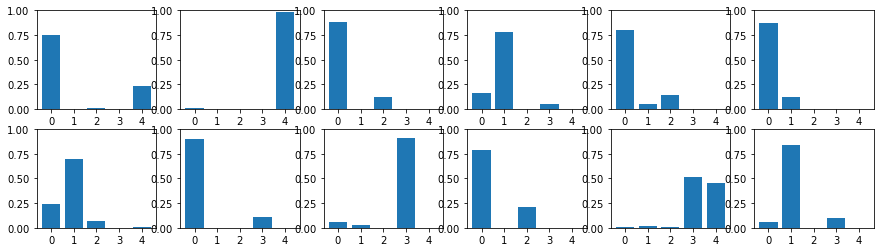

In [13]:
alfa = (0.5, 0.1, 0.1, 0.1, 0.1)

plt.figure(figsize=(15,4))
for i in range(1,13):
    plt.subplot(2,6,i)
    plt.bar(range(5),np.random.dirichlet(alfa, 1)[0])
    plt.ylim(0,1)
    plt.xticks(range(5))
plt.show()

# PIERWSZY JEST NAJCZĘSTSZY (bo pierwsza wartość w wektorze alfa jest największa)

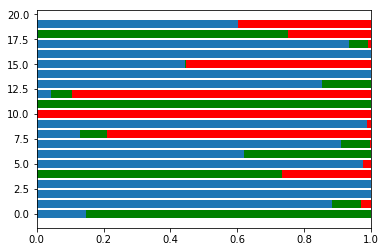

In [53]:
s = np.random.dirichlet((0.2, 0.1, 0.1), 20).transpose()

plt.barh(range(20), s[0])
plt.barh(range(20), s[1], left=s[0], color='g')
plt.barh(range(20), s[2], left=s[0]+s[1], color='r')
plt.show()

<br>

<br>

<br>

<br>

# Model LDA

<img src="Grafika/LDA_doc.jpg">

<br>

<br>

<br>

<br>

<img src="Grafika/Smoothed_LDA.png">


,gdzie

$\theta_d \sim Dir(\alpha)$  - rozkład tematów w dokumencie

$Z \sim Discr(\theta)$ - temat, którego pochodz słowo

$W \sim Discr(\phi_Z)$ - słowo

$\phi_i \sim Dir(\beta)$ - tematy

Dokumenty będą składać sie tylko z kilku tematów (alfa będzie mała).

Tematy będą charakteryzowane również tylko przez cześć słów (beta małe). Dzięki temu możemy ludzkim okiem rozróżnić i zintepretować tematy.

### LDA w module GENSIM

Gensim to modul przeznaczony do analizy tekstów: https://radimrehurek.com/gensim/

In [14]:
from gensim import corpora, models
from gensim.models.ldamodel import LdaModel

a = [nltk.word_tokenize(x) for x in articles]

dictionary = corpora.Dictionary(a)
corpus = [dictionary.doc2bow(text) for text in a]

In [15]:
a[0]

['mathemat',
 'integr',
 'assign',
 'number',
 'function',
 'way',
 'describ',
 'displac',
 'area',
 'volum',
 'concept',
 'aris',
 'combin',
 'infinitesim',
 'data',
 'integr',
 'one',
 'two',
 'main',
 'oper',
 'calculu',
 'invers',
 'oper',
 'differenti',
 'given',
 'function',
 'f',
 'real',
 'variabl',
 'x',
 'interv',
 'b',
 'real',
 'line',
 'definit',
 'integr',
 'defin',
 'inform',
 'sign',
 'area',
 'region',
 'xy',
 'plane',
 'bound',
 'graph',
 'f',
 'x',
 'axi',
 'vertic',
 'line',
 'x',
 'x',
 'b',
 'area',
 'x',
 'axi',
 'add',
 'total',
 'x',
 'axi',
 'subtract',
 'total',
 'oper',
 'integr',
 'addit',
 'constant',
 'invers',
 'oper',
 'differenti',
 'reason',
 'term',
 'integr',
 'may',
 'also',
 'refer',
 'relat',
 'notion',
 'antideriv',
 'function',
 'f',
 'whose',
 'deriv',
 'given',
 'function',
 'f',
 'case',
 'call',
 'indefinit',
 'integr',
 'written',
 'integr',
 'discuss',
 'articl',
 'term',
 'definit',
 'integr',
 'fundament',
 'theorem',
 'calculu',
 'conn

In [55]:
dictionary.keys()[-1]  
# - lista ID slow - wektor wartosci od 0 do liczby roznych slow

7108

In [56]:
dictionary.get(45)  # - slowa

'2/3'

In [57]:
dictionary.id2token[45]

'2/3'

In [58]:
corpus[1] # - dokumenty w postaci listy krotek (id slowa, licznosc wystapien tego slowa)

[(0, 4),
 (2, 3),
 (7, 2),
 (13, 1),
 (16, 19),
 (17, 43),
 (21, 61),
 (22, 2),
 (24, 1),
 (26, 1),
 (43, 5),
 (54, 1),
 (65, 2),
 (69, 1),
 (80, 4),
 (82, 1),
 (89, 1),
 (90, 1),
 (93, 1),
 (96, 2),
 (97, 1),
 (100, 1),
 (102, 2),
 (106, 2),
 (107, 4),
 (109, 1),
 (110, 5),
 (113, 10),
 (117, 1),
 (121, 3),
 (124, 3),
 (126, 4),
 (127, 2),
 (128, 8),
 (130, 1),
 (133, 9),
 (137, 1),
 (138, 1),
 (140, 1),
 (141, 4),
 (145, 1),
 (148, 22),
 (151, 1),
 (152, 1),
 (156, 2),
 (162, 1),
 (164, 3),
 (169, 1),
 (172, 11),
 (177, 1),
 (184, 11),
 (186, 1),
 (189, 3),
 (190, 1),
 (195, 1),
 (197, 7),
 (201, 1),
 (203, 1),
 (210, 2),
 (217, 7),
 (224, 6),
 (225, 1),
 (228, 1),
 (229, 6),
 (235, 2),
 (240, 2),
 (244, 2),
 (246, 8),
 (249, 2),
 (250, 2),
 (253, 2),
 (254, 3),
 (256, 4),
 (259, 6),
 (260, 1),
 (264, 5),
 (266, 4),
 (270, 1),
 (276, 18),
 (282, 13),
 (283, 21),
 (287, 1),
 (288, 1),
 (289, 4),
 (297, 1),
 (299, 1),
 (300, 2),
 (302, 8),
 (304, 5),
 (307, 1),
 (314, 1),
 (316, 2),
 (

In [16]:
model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, alpha="auto")

In [ ]:
?LdaModel

"auto" dla parametrów alfa i eta (eta jest używane zamiennie z beta) oznacza, że model znajdzie optymalne wartości, ale będą to wektory.

### Wypisania rozkładów tematów w dokumentach (jest trudne bo dane są zapisane w formacie rzadkim zapisana jest tylko cześć tematów - te, które mają bardzo niski udział zostają pominięte)

In [17]:
for i in range(len(articles)):
    print(model.get_document_topics(corpus[i], 
                                    minimum_probability=0.1))

[(0, 0.5912064), (1, 0.40823278)]
[(0, 0.19395615), (1, 0.8055859)]
[(0, 0.38898802), (1, 0.6091131)]
[(1, 0.90761214)]
[(1, 0.9981186)]
[(0, 0.6039146), (1, 0.37234068)]
[(0, 0.99964243)]
[(0, 0.99863946)]
[(0, 0.9776378)]
[(2, 0.99884206)]
[(0, 0.46809155), (1, 0.36638245), (2, 0.16552597)]


Rozkład słów w temacie $k$ - analogicznie jak wyżej, dane są w formacie rzadkim, dlatego mamy tylko najczęstsze słowa. Są to krotki (id_slowa, prawdopodobieństwo wystapienia słowa w tym temacie)

In [ ]:
# porownajmy z tematami rzeczywistymi:
titles

In [18]:
k = 0
model.get_topic_terms(topicid=k)

[(814, 0.012637128),
 (534, 0.010770847),
 (436, 0.0081246905),
 (1013, 0.0072860494),
 (2161, 0.007128633),
 (2439, 0.00665531),
 (2741, 0.0060957363),
 (1009, 0.0060936515),
 (6959, 0.0060477126),
 (386, 0.0059137926)]

In [24]:
z = [dictionary.get(w) for w,_ in model.get_topic_terms(topicid=k)]
z

['s',
 'integr',
 'function',
 'x',
 'gogh',
 'paint',
 'van',
 'work',
 'tolkien',
 'f']

In [19]:
z = [model[dictionary.doc2bow(text)] for text in a]
z

[[(0, 0.5465673), (1, 0.45295724)],
 [(0, 0.19734477), (1, 0.8021973)],
 [(0, 0.4181724), (1, 0.57993186)],
 [(1, 0.89241767), (2, 0.106079705)],
 [(1, 0.9981181)],
 [(0, 0.64184606), (1, 0.34211233), (2, 0.016041562)],
 [(0, 0.9996529)],
 [(0, 0.99863994)],
 [(0, 0.97312385), (2, 0.02361974)],
 [(2, 0.9988765)],
 [(0, 0.5119288), (1, 0.33261824), (2, 0.15545292)]]

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Wizualizacja modelu LDA:

pyLDAvis: http://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb

### Zadanie do domu

Rozważamy problem klasyfikacji dokumentów z korpusu 20NEWSGROUP - chcemy nauczyć klasyfikator rozpoznawać kategorię dokumentu (tę podaną w danych). Przetestuj różne rodzaje reprezentacji tekstu (w różnych wariantach) wykorzystując kilka różnych klasyfikatorów.

Reprezentacje korpusu:

- macierz liczności wystąpień słów
- macierz tfidf
- lda (użyć obiektu z sklearna `from sklearn.decomposition import LatentDirichletAllocation` - o ile uda się to policzyć... warto pobadać ile czas trwa uczenie w zależności od wiekości danych)
- LSI

 
### Materiały i źródła:

https://radimrehurek.com/gensim/wiki.html

http://radimrehurek.com/topic_modeling_tutorial/2%20-%20Topic%20Modeling.html

https://www.ariddell.org/lda.html

http://brandonrose.org/clustering

http://totoharyanto.staff.ipb.ac.id/files/2012/10/Building-Machine-Learning-Systems-with-Python-Richert-Coelho.pdf

https://de.dariah.eu/tatom/topic_model_python.html

### Ciekawe zadania z NLP

http://poleval.pl/

http://www.fakenewschallenge.org/